In [3]:
import pandas as pd
# # DATASET
# ! unzip ./dataset/*.zip
# ! mv *.csv data.csv

DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

path="./dataset/data.csv"
df= pd.read_csv(path,encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

Analyze the dataset

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [6]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 349 ms, sys: 11.6 ms, total: 360 ms
Wall time: 376 ms


In [7]:
from collections import Counter
target_cnt = Counter(df.target)
print(target_cnt)

Counter({'NEGATIVE': 800000, 'POSITIVE': 800000})


Preprocess the dataset
1. drop unnecessery cols

In [8]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)
df.head()

,target,text
0,NEGATIVE,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,is upset that he can't update his Facebook by ...
2,NEGATIVE,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,my whole body feels itchy and like its on fire
4,NEGATIVE,"@nationwideclass no, it's not behaving at all...."


2. clean the texts

In [9]:
%%time

import re
# Function to clean the text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()
df['text'] = df['text'].apply(clean_text)

CPU times: user 15.1 s, sys: 66.4 ms, total: 15.1 s
Wall time: 15.3 s


In [10]:
df.head()

,target,text
0,NEGATIVE,http twitpic com y zl awww that s a bummer you...
1,NEGATIVE,is upset that he can t update his facebook by ...
2,NEGATIVE,i dived many times for the ball managed to sav...
3,NEGATIVE,my whole body feels itchy and like its on fire
4,NEGATIVE,no it s not behaving at all i m mad why am i h...


In [11]:
# nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from  nltk.stem import SnowballStemmer


stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
%%time

def preprocess(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 34 s, sys: 164 ms, total: 34.2 s
Wall time: 35.1 s


In [13]:
df.head()

,target,text
0,NEGATIVE,http twitpic com zl awww bummer shoulda got da...
1,NEGATIVE,upset update facebook texting might cry result...
2,NEGATIVE,dived many times ball managed save rest go bounds
3,NEGATIVE,whole body feels itchy like fire
4,NEGATIVE,behaving mad see


In [34]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 517.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 24.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def getWC(sentiment):
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == sentiment].text))
    return wc

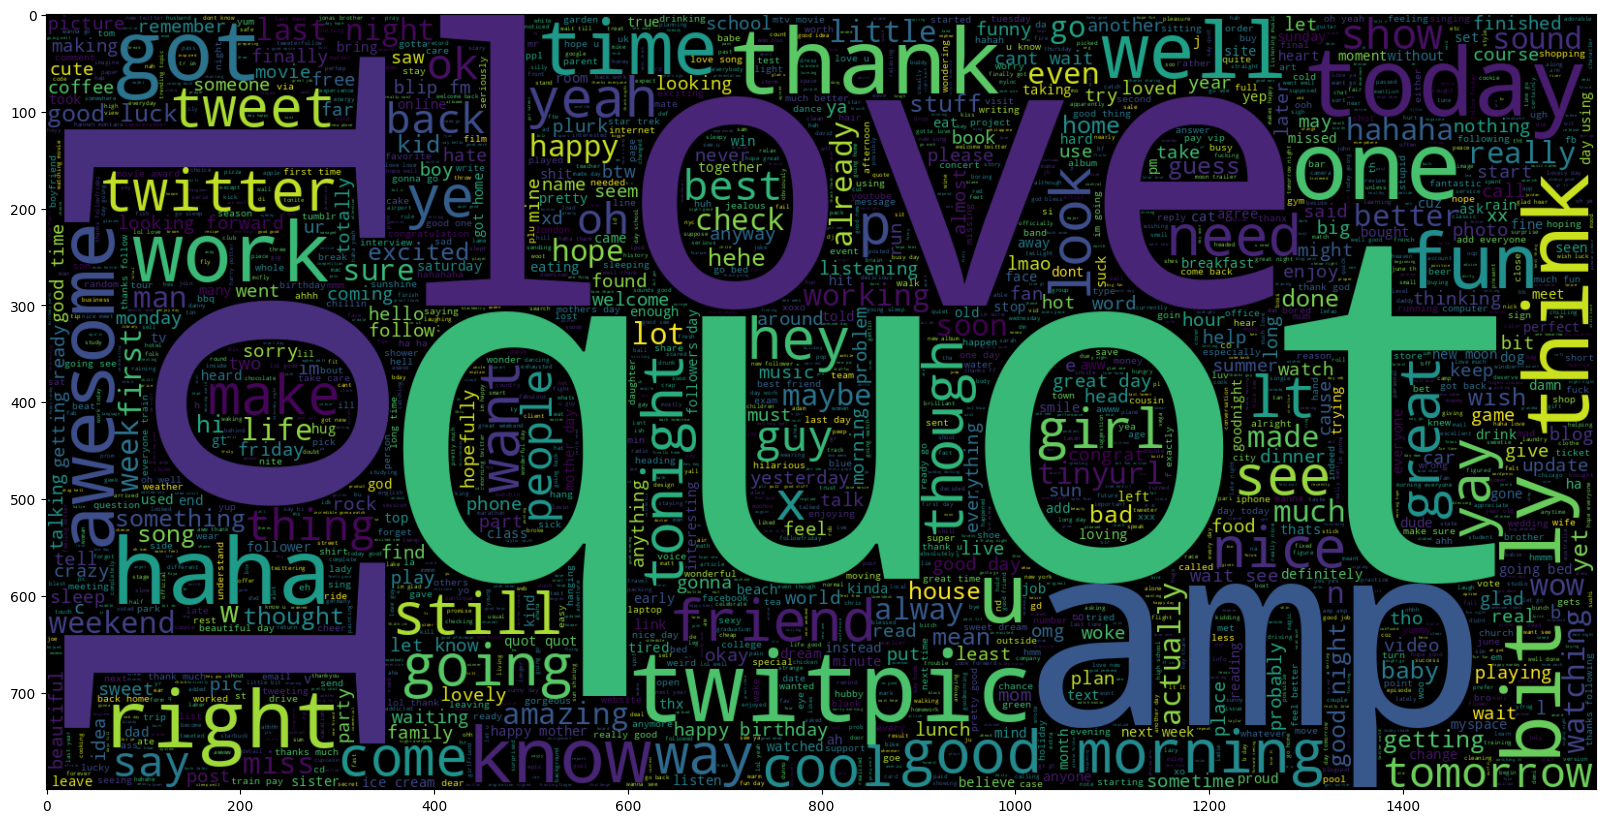

In [28]:
plt.figure(figsize = (20,20))
wc= getWC('POSITIVE')
plt.imshow(wc , interpolation = 'bilinear')

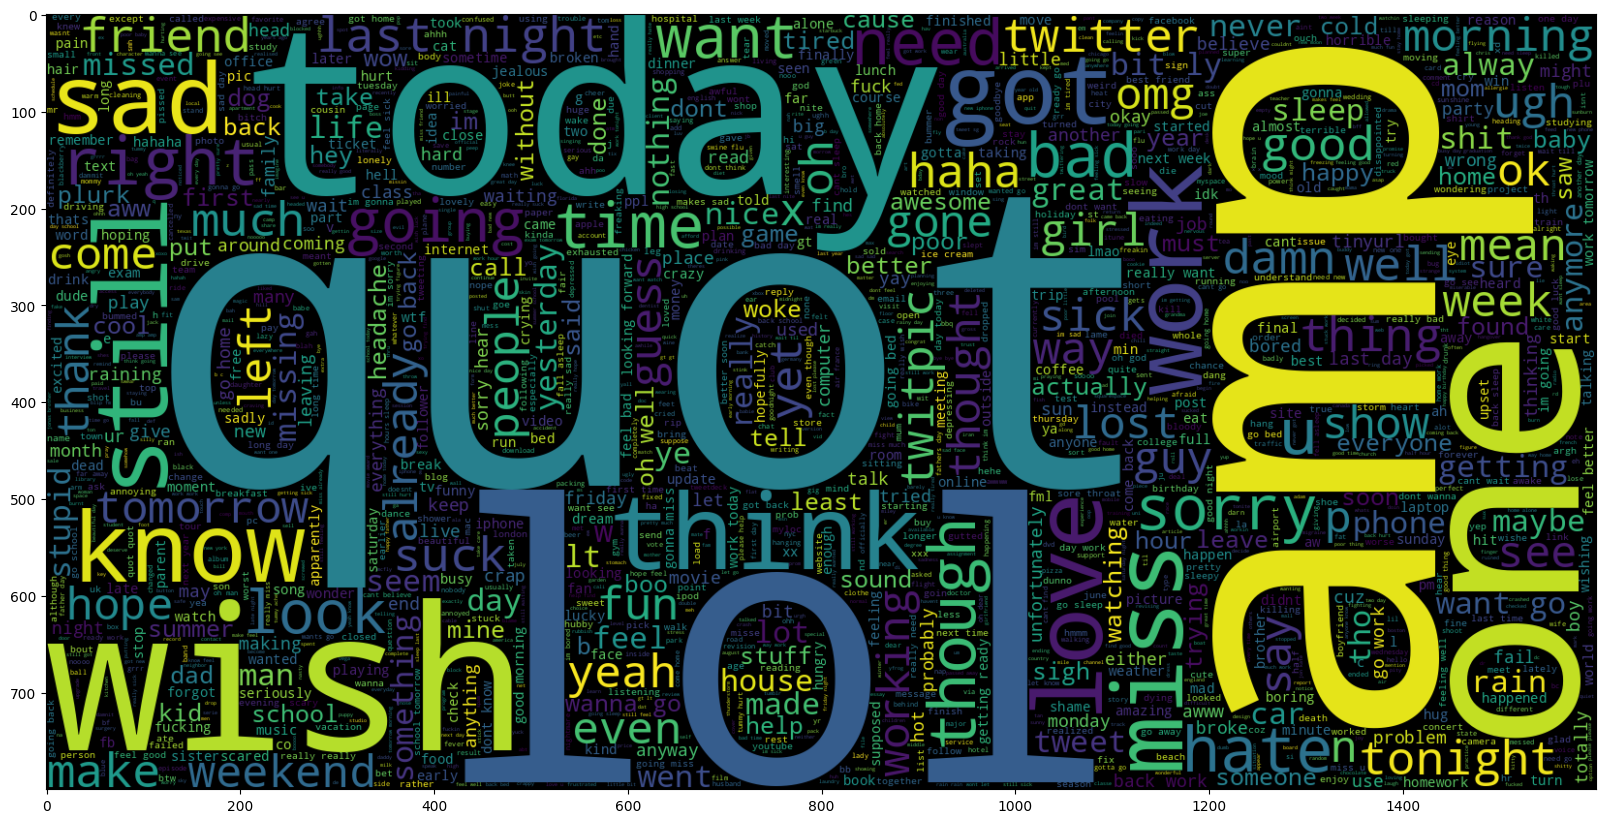

In [27]:
plt.figure(figsize = (20,20))
wc= getWC('NEGATIVE')
plt.imshow(wc , interpolation = 'bilinear')

In [29]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=1-0.7, random_state=7)

print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1119999
Test Data size 480001


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)